In [1]:
# 4章. MeCabを使った形態素解析
# neko.txt.M\mecabの作成
import MeCab

mecab = MeCab.Tagger()
with open('data/ch04/neko.txt', encoding='utf-8') as f:
    data = f.read()

with open('data/ch04/neko.txt.mecab', 'w', encoding='utf-8') as f:
    f.write(mecab.parse(data))

In [2]:
# 30. 形態素解析結果の読み込み
# MeCab output: 表層形\t品詞,品詞細分類1,2,3,活用形,活用型,原形,読み,発音
# unknown word: 表層形\t品詞,品詞細分類1,2,3,活用形,活用型,原形
# 表層形(surface), 基本形(base), 品詞(pos), 品詞細分類1(pos1)を辞書型に格納
import re
def create_dict_list():
    with open('data/ch04/neko.txt.mecab', encoding='utf-8') as f:
        mecab_output = f.readlines()
    i=0
    dict_list = []
    for line in mecab_output:
        if re.search('EOS', line): break
        dict = {}
        line_splited = re.findall('(.*?)\t(.*)', line)
        dict['surface'] = line_splited[0][0]
        dict['base'] = line_splited[0][1].split(',')[6]
        dict['pos']  = line_splited[0][1].split(',')[0]
        dict['pos1'] = line_splited[0][1].split(',')[1]
        dict_list.append(dict)
    return dict_list

dict_list = create_dict_list()

print(f'display first 10 dict\n\n{dict_list[:10]}')

display first 10 dict

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


In [3]:
# 31. 動詞
# create_dict_list: def in 30
dict_list = create_dict_list()
verb_surface_list = [dict['surface'] for dict in dict_list if dict['pos'] == '動詞']

print(f'display first 30 verbs\n\n{verb_surface_list[:30]}')

display first 30 verbs

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ']


In [4]:
# 32. 動詞の基本形
dict_list = create_dict_list()
verb_surface_list = [dict['base'] for dict in dict_list if dict['pos'] == '動詞']

print(f'display first 30 verbs\' stem\n\n{verb_surface_list[:30]}')

display first 30 verbs' stem

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う']


In [5]:
# 33. 「AのB」
dict_list = create_dict_list()
b_of_a_list = []
for i in range(len(dict_list)-2):
    if (dict_list[i]['pos']=='名詞') & (dict_list[i+1]['surface']=='の') & (dict_list[i+2]['pos']=='名詞'):
        b_of_a_list.append(dict_list[i]['surface']+dict_list[i+1]['surface']+dict_list[i+2]['surface'])

print(f'display first 30 "B of A"\n\n{b_of_a_list[:30]}')

display first 30 "B of A"

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔']


In [6]:
# 34. 名詞の連接(conjugation)
dict_list = create_dict_list()
noun_conjugation_list = []
i = 0
while i<len(dict_list)-1:
    if (dict_list[i]['pos']=='名詞') & (dict_list[i+1]['pos']=='名詞'):
        noun_conjugation = ''
        while dict_list[i]['pos']=='名詞':
            noun_conjugation += dict_list[i]['surface']
            i += 1
        noun_conjugation_list.append(noun_conjugation)
    else:
        i += 1

print(f'display first 30 noun conjugations\n\n{noun_conjugation_list[:30]}')

display first 30 noun conjugations

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫']


In [7]:
# 35. 単語の出現頻度
from collections import Counter
dict_list = create_dict_list()
word_list = [dict['surface'] for dict in dict_list]

word_counter = Counter(word_list).most_common()

print(f'display the 30 most frequent words\n\n{word_counter[:30]}')

display the 30 most frequent words

[('の', 9194), ('。', 7486), ('て', 6873), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3989), ('で', 3813), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2391), ('だ', 2367), ('し', 2328), ('から', 2043), ('ある', 1730), ('な', 1612), ('ん', 1568), ('か', 1531), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 992), ('もの', 981), ('君', 973), ('です', 973)]


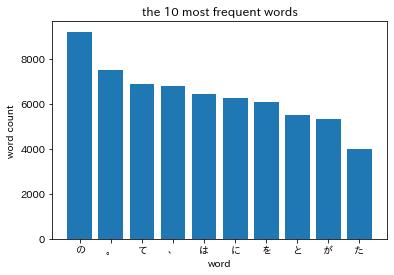

In [8]:
# 36. 頻度上位10語
# using code in 35
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib
dict_list = create_dict_list()
word_list = [dict['surface'] for dict in dict_list]

word_counter = Counter(word_list).most_common()

left = [i for i in range(10)]
height = [word[1] for word in word_counter][:10]
label  = [word[0] for word in word_counter][:10]

plt.bar(left, height, tick_label=label)
plt.xlabel('word')
plt.ylabel('word count')
plt.title('the 10 most frequent words')
plt.show()

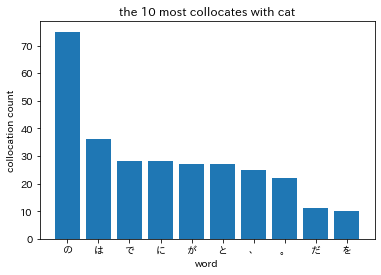

In [9]:
# 37. 「猫」と共起頻度の高い上位10語
# using code in 36
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib
dict_list = create_dict_list()
word_list = [dict['surface'] for dict in dict_list]

bigram_collocate_list = []
for i in range(len(word_list)-1):
    if word_list[i]=='猫':
        bigram_collocate_list += [word_list[i-1], word_list[i+1]]

collocate_counter = Counter(bigram_collocate_list).most_common()

left = [i for i in range(10)]
height = [word[1] for word in collocate_counter][:10]
label  = [word[0] for word in collocate_counter][:10]

plt.bar(left, height, tick_label=label)
plt.xlabel('word')
plt.ylabel('collocation count')
plt.title('the 10 most collocates with cat')
plt.show()

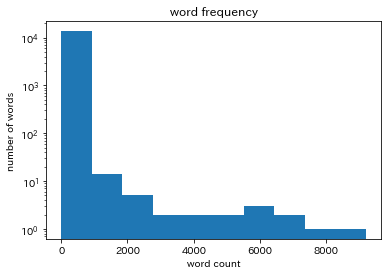

In [10]:
# 38. ヒストグラム
# using code in 36
from collections import Counter
import matplotlib.pyplot as plt
dict_list = create_dict_list()
word_list = [dict['surface'] for dict in dict_list]

# word_counter: {'word': count}
# count_list  : [count]
word_counter = Counter(word_list)
count_list   = word_counter.values()

plt.hist(count_list, log=True)
plt.xlabel('word count')
plt.ylabel('number of words')
plt.title('word frequency')
plt.show()

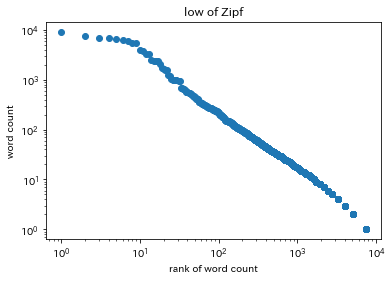

In [11]:
# 39. Zipfの法則
# using code in 38
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
dict_list = create_dict_list()
word_list = [dict['surface'] for dict in dict_list]

# word_counter: {'word': count}
# count_list  : [count]
# df: pd(counts, rank) (descending by counts)
word_counter = Counter(word_list)
count_list   = list(word_counter.values())
df = pd.DataFrame({'counts':count_list})
df.sort_values('counts', ascending=False, inplace=True)
df['rank'] = df.counts.rank(ascending=False, method='min')

plt.scatter(list(df['rank']), list(df['counts']))
plt.loglog()
plt.xlabel('rank of word count')
plt.ylabel('word count')
plt.title('low of Zipf')
plt.show()